In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [40]:
df=pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\HRUTUJA\Imarticus\Dataset\AAPL.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-12-01 00:00:00+00:00,117.34,118.81,116.86,118.75,34852374,27.174604,27.515039,27.063442,27.501144,139409496,0.0,1.0
1,AAPL,2015-12-02 00:00:00+00:00,116.28,118.11,116.08,117.05,33386563,26.929120,27.352927,26.882803,27.107443,133546252,0.0,1.0
2,AAPL,2015-12-03 00:00:00+00:00,115.20,116.79,114.22,116.55,41569509,26.679005,27.047230,26.452048,26.991649,166278036,0.0,1.0
3,AAPL,2015-12-04 00:00:00+00:00,119.03,119.25,115.11,115.29,57776977,27.565989,27.616938,26.658162,26.699848,231107908,0.0,1.0
4,AAPL,2015-12-07 00:00:00+00:00,118.28,119.86,117.81,118.98,32084249,27.392297,27.758207,27.283451,27.554409,128336996,0.0,1.0


In [42]:
df.shape

(1258, 14)

In [44]:
df=df.iloc[:,[1,2]]
df

,date,close
0,2015-12-01 00:00:00+00:00,117.34
1,2015-12-02 00:00:00+00:00,116.28
2,2015-12-03 00:00:00+00:00,115.20
3,2015-12-04 00:00:00+00:00,119.03
4,2015-12-07 00:00:00+00:00,118.28
...,...,...
1253,2020-11-20 00:00:00+00:00,117.34
1254,2020-11-23 00:00:00+00:00,113.85
1255,2020-11-24 00:00:00+00:00,115.17
1256,2020-11-25 00:00:00+00:00,116.03


<Axes: xlabel='date'>

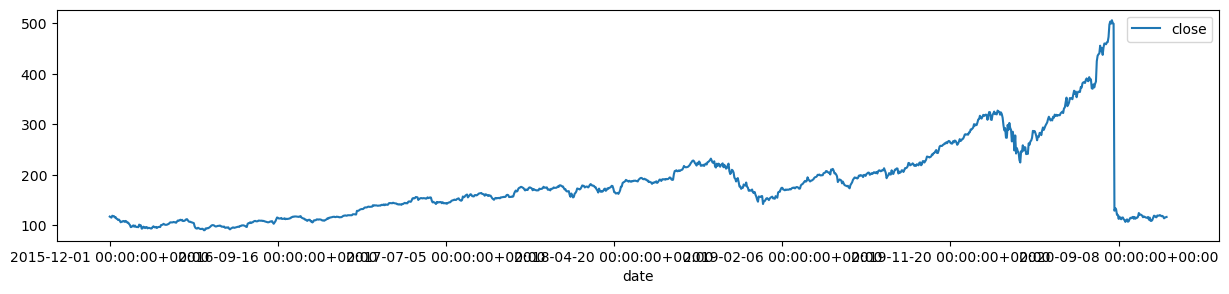

In [46]:
df.plot.line(x = 'date',y = 'close',figsize=(15,3))

In [80]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['close'])
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Test Statistic                   -2.632990
p-value                           0.086369
#lags used                        0.000000
number of observations used    1257.000000
dtype: float64

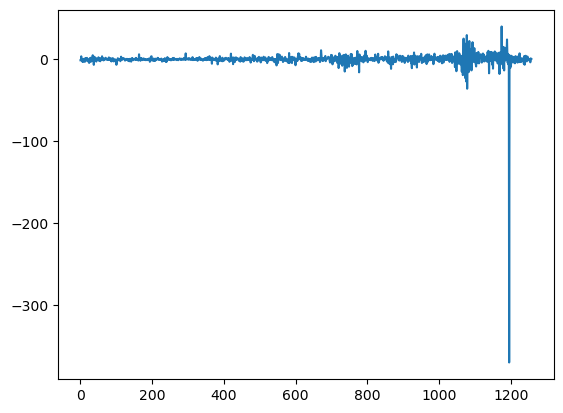

In [50]:
from matplotlib import pyplot

diff = df.close.diff()
pyplot.plot(diff)
pyplot.show()

In [54]:
df['diff_1'] = df['close'].diff()  # 1st order
df['diff_2'] = df['diff_1'].diff() # 2nd order
df

,date,close,diff_1,diff_2
0,2015-12-01 00:00:00+00:00,117.34,NaN,NaN
1,2015-12-02 00:00:00+00:00,116.28,-1.06,NaN
2,2015-12-03 00:00:00+00:00,115.20,-1.08,-0.02
3,2015-12-04 00:00:00+00:00,119.03,3.83,4.91
4,2015-12-07 00:00:00+00:00,118.28,-0.75,-4.58
...,...,...,...,...
1253,2020-11-20 00:00:00+00:00,117.34,-1.30,-1.91
1254,2020-11-23 00:00:00+00:00,113.85,-3.49,-2.19
1255,2020-11-24 00:00:00+00:00,115.17,1.32,4.81
1256,2020-11-25 00:00:00+00:00,116.03,0.86,-0.46


In [60]:
import numpy as np
np.var(df.iloc[:,1:]) 

close     5765.339528
diff_1     126.872681
diff_2     261.611496
dtype: float64

In [62]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df.diff_1.loc[1:,])
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
dfoutput

Observations of Dickey-fuller test


Test Statistic                  -36.497474
p-value                           0.000000
#lags used                        0.000000
number of observations used    1256.000000
dtype: float64

<Axes: xlabel='date'>

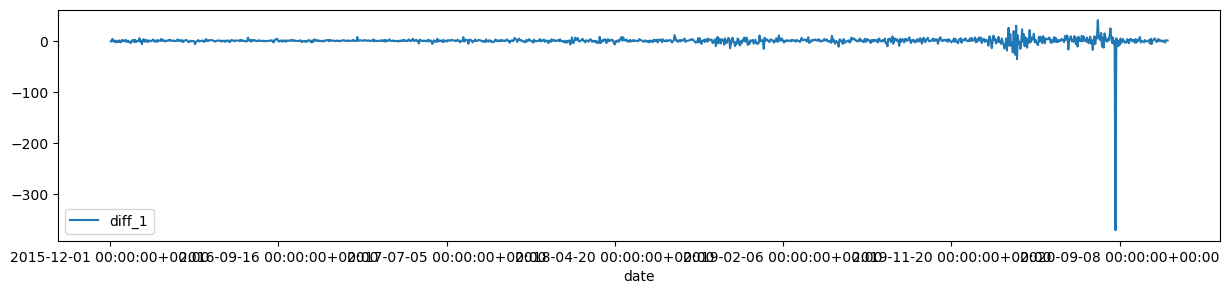

In [64]:
df.plot.line(x = 'date',y = 'diff_1',figsize=(15,3))

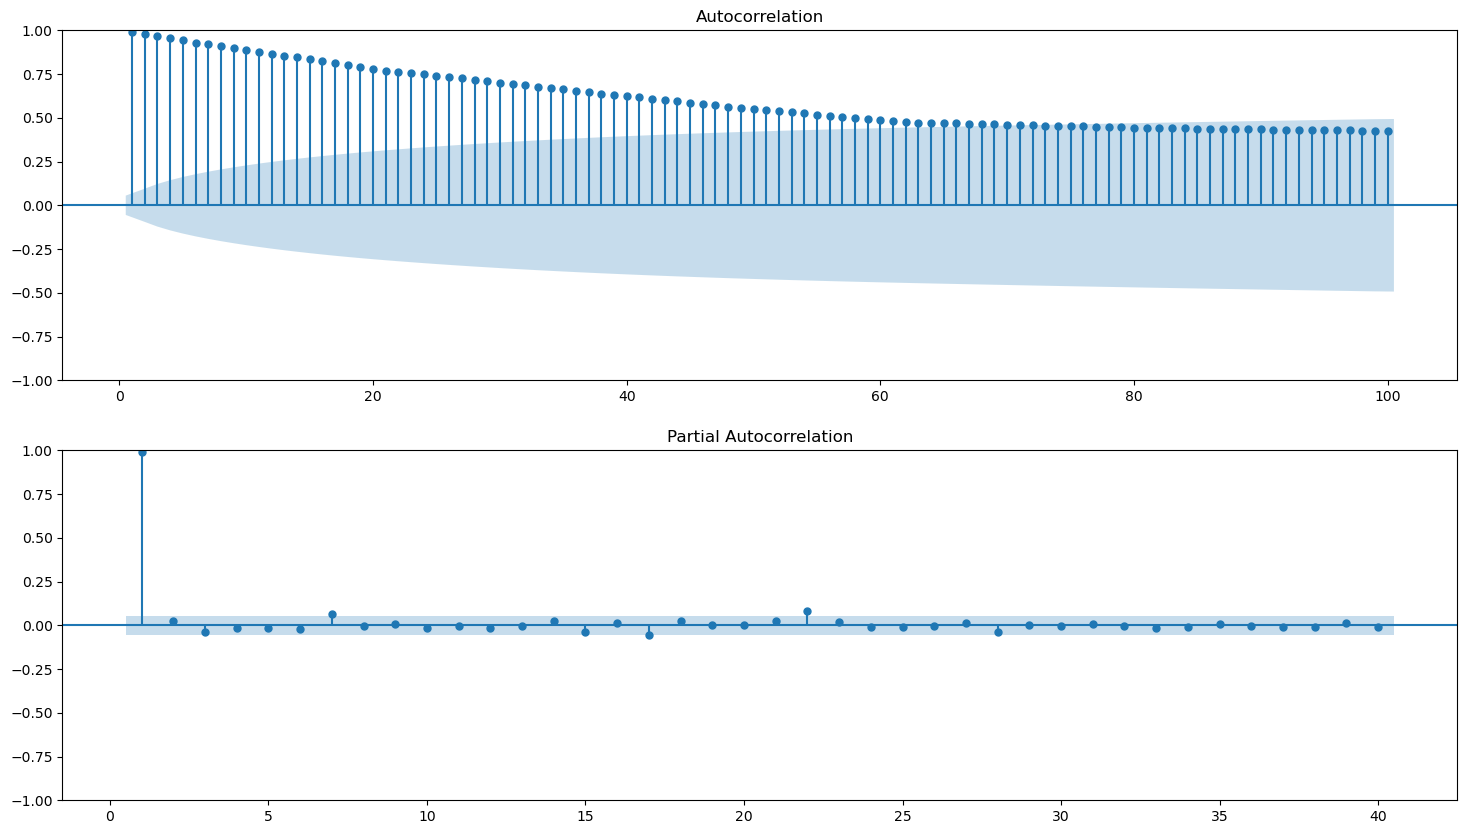

In [66]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
plot_acf(df['close'],lags=100, ax=ax[0],zero=False)  # q = 0
plot_pacf(df['close'],lags=40, ax=ax[1],zero=False)  # p = 2
plt.show()

In [68]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(df.close,
                      start_p=0,max_p=3, # Pacf(p) = 0,1,2,3
                      d=0,max_d=2,       # Difference (d) = 0,1,2
                      start_q=0,max_q=3, # acf (q) = 0,1,2,3
                      m=12,              # frequency of series
                      seasonal=False,    # No Seasonality  then below P,D,Q will not be used 
                      test='adf',       # use adftest to find optimal 'd'
                      trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=16871.131, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=15235.411, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9671.738, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9674.587, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=9672.446, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=9674.165, Time=0.31 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9666.582, Time=0.41 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12987.790, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9665.305, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=14467.850, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9666.527, Time=0.29 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=96

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -4829.653
Date:                Tue, 13 Aug 2024   AIC                           9665.305
Time:                        11:18:14   BIC                           9680.717
Sample:                             0   HQIC                          9671.097
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9390      1.963      0.988      0.323      -1.908       5.786
ar.L1          0.9889      0.007    135.212      0.000       0.975       1.003
sigma2       126.1400      1.336     94.393      0.000     123.521     128.759
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):          42662944.27
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):             131.52   Skew:                           -27.59
Prob(H) (two-sided):                  0.00   Kurtosis:                       903.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
import numpy as np
df['Forecast'] = np.round(model.predict_in_sample(),0)
df.iloc[:,[0,1,4]]

,date,close,Forecast
0,2015-12-01 00:00:00+00:00,117.34,174.0
1,2015-12-02 00:00:00+00:00,116.28,118.0
2,2015-12-03 00:00:00+00:00,115.20,117.0
3,2015-12-04 00:00:00+00:00,119.03,116.0
4,2015-12-07 00:00:00+00:00,118.28,120.0
...,...,...,...
1253,2020-11-20 00:00:00+00:00,117.34,119.0
1254,2020-11-23 00:00:00+00:00,113.85,118.0
1255,2020-11-24 00:00:00+00:00,115.17,115.0
1256,2020-11-25 00:00:00+00:00,116.03,116.0


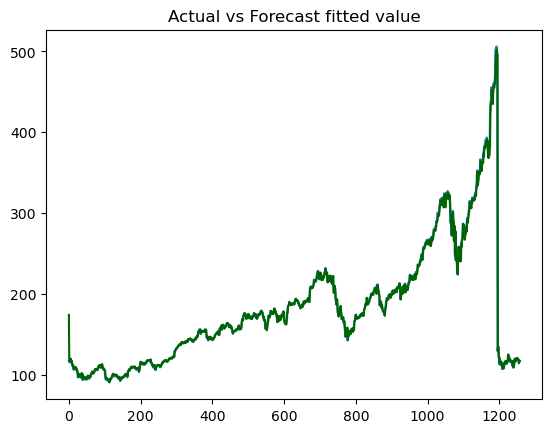

In [74]:
# Plot
plt.plot(df.close)
plt.plot(df.Forecast, color='darkgreen')
plt.title("Actual vs Forecast fitted value")
plt.show()

In [76]:
def forecast_accuracy(actual,forecast):
    mape = (np.mean(np.abs(actual-forecast)/np.abs(actual)))*100  # MAPE
    return({'MAPE':mape})

forecast_accuracy(df.close,df.Forecast)

{'MAPE': 1.6043912469561064}

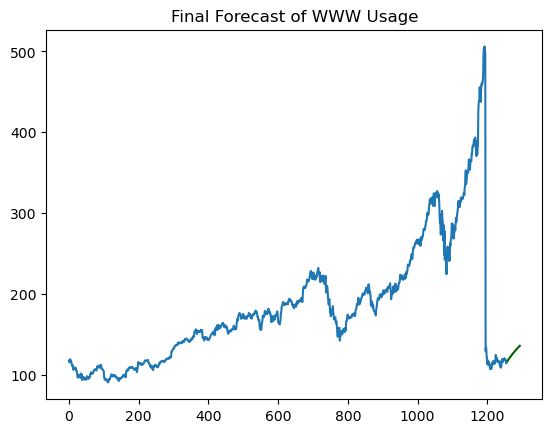

In [78]:
n_periods = 36
fc = model.predict(n_periods=n_periods)

index_of_fc = np.arange(len(df.close), len(df.close)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)

# Plot
plt.plot(df.close)
plt.plot(fc_series, color='darkgreen')
plt.title("Final Forecast of WWW Usage")
plt.show()